In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp "/content/drive/My Drive/xray-pneumonia.zip" "/content/"


In [3]:
!unzip -q xray-pneumonia.zip


In [4]:
# 1. استيراد المكتبات (إذا كنت قد فعلتها من قبل، لا بأس من إعادتها)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 2. تحديد المسارات الصحيحة
train_path = 'chest_xray/chest_xray/train'
test_path = 'chest_xray/chest_xray/test'
val_path = 'chest_xray/chest_xray/val'

# 3. إنشاء مولدات الصور
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 4. تحميل الصور من المجلدات
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Building a Convolutional Neural Network (CNN) model

#1. Create the serial model
model = keras.models.Sequential()

#2. Adding Layers
# First convolutional layer (to extract initial features)
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(2, 2))

# Second convolutional layer (to extract more complex features)
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

#3rd convolutional layer
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2, 2))

#3. Convert features to a single vector
model.add(keras.layers.Flatten())

#4. Add a fully connected layer for decision making
model.add(keras.layers.Dense(512, activation='relu'))

# 5. The final layer (Output)
# It contains only one neuron because we have a binary classification (infected or healthy)
model.add(keras.layers.Dense(1, activation='sigmoid'))

#6. View a summary of the form
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 1. Compile the model
model.compile(
    optimizer='adam',             # The algorithm that improves the model
    loss='binary_crossentropy',   # The loss function for binary classification
    metrics=['accuracy']          # The metric we want to monitor (accuracy)
)

# 2. Start the training process
# We will train the model for 10 epochs as a start
history = model.fit(
    training_set,
    epochs=10,
    validation_data=validation_set
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 452ms/step - accuracy: 0.7488 - loss: 0.5726 - val_accuracy: 0.8125 - val_loss: 0.4806
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 425ms/step - accuracy: 0.8965 - loss: 0.2444 - val_accuracy: 0.8750 - val_loss: 0.3772
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.9078 - loss: 0.2221 - val_accuracy: 0.6875 - val_loss: 0.7793
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 418ms/step - accuracy: 0.9287 - loss: 0.1753 - val_accuracy: 0.7500 - val_loss: 0.6753
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 416ms/step - accuracy: 0.9281 - loss: 0.1736 - val_accuracy: 0.6250 - val_loss: 0.9497
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 416ms/step - accuracy: 0.9391 - loss: 0.1649 - val_accuracy: 0.6250 - val_loss: 0.9330
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 416ms/step - accuracy: 0.9487 - loss: 0.1368 - val_accuracy: 0.7500 - val_loss: 0.4500
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 426ms/step - accuracy: 0.9486 - loss: 0

In [9]:
# Step 5: Evaluate the model on the test set

# The evaluate function will predict on the test images
# and compare the results with the true labels.
test_loss, test_accuracy = model.evaluate(test_set)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.8956 - loss: 0.3944
Test Accuracy: 90.22%
Test Loss: 0.3704025447368622


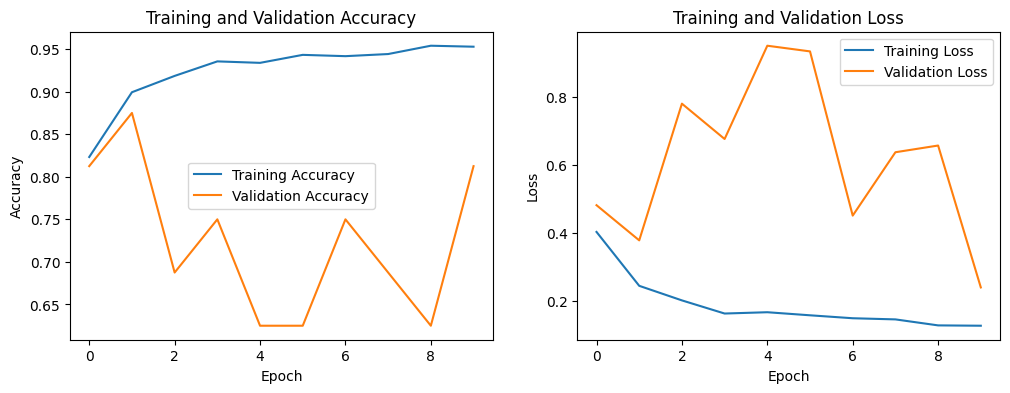

In [10]:
# Step 6: Visualize Training History

# Import the plotting library
import matplotlib.pyplot as plt

# --- Plot 1: Accuracy over Epochs ---
plt.figure(figsize=(12, 4))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# --- Plot 2: Loss over Epochs ---
# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
Prediction: NORMAL
Confidence: 66.69%


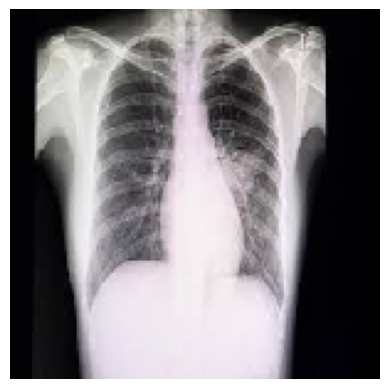

In [12]:
# Step 7 (Alternative Method): Predict on a locally uploaded image

import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# The name of the image you uploaded
image_path = 'images.jpeg' # Make sure the name matches the uploaded file

try:
    # Preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image

    # Make a prediction
    prediction = model.predict(img_array)

    # Display the image
    plt.imshow(img)
    plt.axis('off')

    # Interpret the prediction
    if prediction[0][0] > 0.5:
        print("Prediction: PNEUMONIA")
        print(f"Confidence: {prediction[0][0] * 100:.2f}%")
    else:
        print("Prediction: NORMAL")
        print(f"Confidence: {(1 - prediction[0][0]) * 100:.2f}%")

except FileNotFoundError:
    print(f"Error: Make sure you have uploaded the file '{image_path}' to Colab.")
except Exception as e:
    print(f"An error occurred: {e}")


In [13]:
# =================================================================
#               PROPOSAL 1: IMPROVING THE CURRENT MODEL
# =================================================================

# Import necessary layers, including Dropout
from tensorflow import keras
from tensorflow.keras import layers

print("--- Building the Improved Model (v2) with Dropout ---")

# --- Build the Improved CNN Model (v2) ---
model_v2 = keras.Sequential([
    # 1st Block
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150, 150, 3]),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5), # <-- Added Dropout to fight overfitting

    # 2nd Block
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5), # <-- Added Dropout

    # Flattening
    layers.Flatten(),

    # Full Connection
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5), # <-- Added Dropout on the dense layer

    # Output Layer
    layers.Dense(units=1, activation='sigmoid')
])

# Let's look at the new architecture
model_v2.summary()

print("\n--- Compiling and Training the Improved Model (v2) ---")

# --- Compile the new model ---
model_v2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# --- Train the model for more epochs ---
# We can train for longer because Dropout reduces the risk of overfitting
history_v2 = model_v2.fit(
    training_set,
    epochs=20,  # <-- We increased epochs from 10 to 20
    validation_data=validation_set
)

print("\n--- Training of Model v2 is complete! ---")


--- Building the Improved Model (v2) with Dropout ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)


--- Compiling and Training the Improved Model (v2) ---
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 417ms/step - accuracy: 0.7161 - loss: 1.1291 - val_accuracy: 0.8125 - val_loss: 0.6371
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 424ms/step - accuracy: 0.8545 - loss: 0.3326 - val_accuracy: 0.9375 - val_loss: 0.4371
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 412ms/step - accuracy: 0.8770 - loss: 0.2836 - val_accuracy: 0.6875 - val_loss: 0.5796
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 413ms/step - accuracy: 0.9074 - loss: 0.2406 - val_accuracy: 0.8750 - val_loss: 0.4008
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 419ms/step - accuracy: 0.9090 - loss: 0.2398 - val_accuracy: 0.7500 - val_loss: 0.5681
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 422ms/step - accuracy: 0.9015 - loss: 0.2555 - val_accuracy: 0.8750 - val_loss: 0.4173
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 412ms/step - accuracy: 0.9140 - loss: 0.2245 - val_accuracy: 0.9375 - val_loss: 0.2801
Epoch 8/20
163/163 ━━━━━━━━

In [14]:
# Step 1: Evaluate the improved model (model_v2) on the test set

print("--- Evaluating Model v2 ---")
test_loss_v2, test_accuracy_v2 = model_v2.evaluate(test_set)

print(f"\nImproved Model - Test Accuracy: {test_accuracy_v2 * 100:.2f}%")
print(f"Improved Model - Test Loss: {test_loss_v2}")


--- Evaluating Model v2 ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.8674 - loss: 0.5758

Improved Model - Test Accuracy: 87.98%
Improved Model - Test Loss: 0.45093268156051636



--- Plotting Learning Curves for Model v2 ---


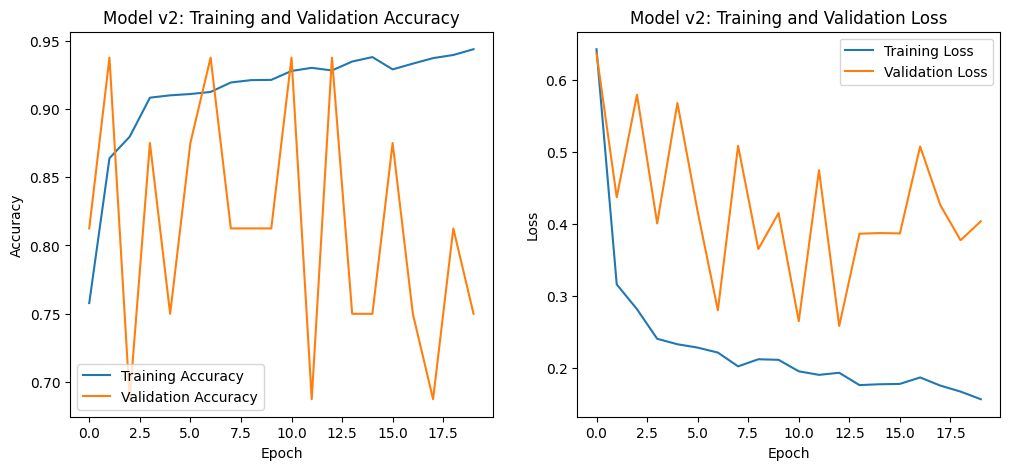

In [15]:
# Step 2: Plot the learning curves for the improved model (history_v2)

print("\n--- Plotting Learning Curves for Model v2 ---")
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_v2.history['accuracy'], label='Training Accuracy')
plt.plot(history_v2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model v2: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_v2.history['loss'], label='Training Loss')
plt.plot(history_v2.history['val_loss'], label='Validation Loss')
plt.title('Model v2: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()


In [16]:
# =================================================================
#               PROPOSAL 2: USING TRANSFER LEARNING (VGG16)
# =================================================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

print("--- Loading the pre-trained VGG16 model ---")

# --- 1. Load the VGG16 model, without its final classification layer ---
# We will use the weights it learned from the 'imagenet' dataset.
# We set include_top=False to remove the final output layer.
# We specify the input shape to match our images.
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# --- 2. Freeze the base model ---
# This is the most important step! We tell Keras: "Do NOT train or change
# the weights of the VGG16 layers. We only want to use them for feature extraction."
base_model.trainable = False

print("\n--- Building our new custom model on top of VGG16 ---")

# --- 3. Create our new model by adding our custom layers on top ---
model_v3 = keras.Sequential([
    base_model,                  # The powerful, pre-trained VGG16 base
    layers.Flatten(),            # Flatten the output of VGG16 to a 1D vector
    layers.Dense(256, activation='relu'), # A new classification layer
    layers.Dropout(0.5),         # We can still use Dropout on our new layers
    layers.Dense(1, activation='sigmoid') # The final output layer (PNEUMONIA/NORMAL)
])

# Let's look at the new super-model architecture
print("\n--- New Model (v3) Architecture ---")
model_v3.summary()

# You will notice it has millions of parameters, but most are "Non-trainable"!

print("\n--- Compiling and Training the new model (v3) ---")

# --- 4. Compile the model ---
# We use a lower learning rate because we are fine-tuning a powerful model.
model_v3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# --- 5. Train the model ---
# We only need a few epochs because the base model is already very smart.
history_v3 = model_v3.fit(
    training_set,
    epochs=10, # 10 epochs are usually enough for this
    validation_data=validation_set
)

print("\n--- Training of Transfer Learning Model (v3) is complete! ---")


--- Loading the pre-trained VGG16 model ---
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

--- Building our new custom model on top of VGG16 ---

--- New Model (v3) Architecture ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


--- Compiling and Training the new model (v3) ---
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 472ms/step - accuracy: 0.8385 - loss: 0.3509 - val_accuracy: 0.8750 - val_loss: 0.2848
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 443ms/step - accuracy: 0.9306 - loss: 0.1740 - val_accuracy: 0.8750 - val_loss: 0.3369
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 435ms/step - accuracy: 0.9383 - loss: 0.1575 - val_accuracy: 0.8125 - val_loss: 0.3582
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 436ms/step - accuracy: 0.9446 - loss: 0.1451 - val_accuracy: 0.8750 - val_loss: 0.3370
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 74s 452ms/step - accuracy: 0.9494 - loss: 0.1342 - val_accuracy: 0.8750 - val_loss: 0.2672
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 71s 436ms/step - accuracy: 0.9474 - loss: 0.1374 - val_accuracy: 0.8125 - val_loss: 0.3575
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 442ms/step - accuracy: 0.9520 - loss: 0.1299 - val_accuracy: 0.8750 - val_loss: 0.2746
Epoch 8/10
163/163 ━━━━━━━━━━━━━

In [17]:
# Step 1: Evaluate the Transfer Learning model (model_v3) on the test set

print("--- Evaluating The Expert Model (v3) ---")
test_loss_v3, test_accuracy_v3 = model_v3.evaluate(test_set)

print(f"\nExpert Model (VGG16) - Test Accuracy: {test_accuracy_v3 * 100:.2f}%")
print(f"Expert Model (VGG16) - Test Loss: {test_loss_v3}")


--- Evaluating The Expert Model (v3) ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.9058 - loss: 0.2451

Expert Model (VGG16) - Test Accuracy: 91.83%
Expert Model (VGG16) - Test Loss: 0.24263054132461548



--- Plotting Learning Curves for The Expert Model (v3) ---


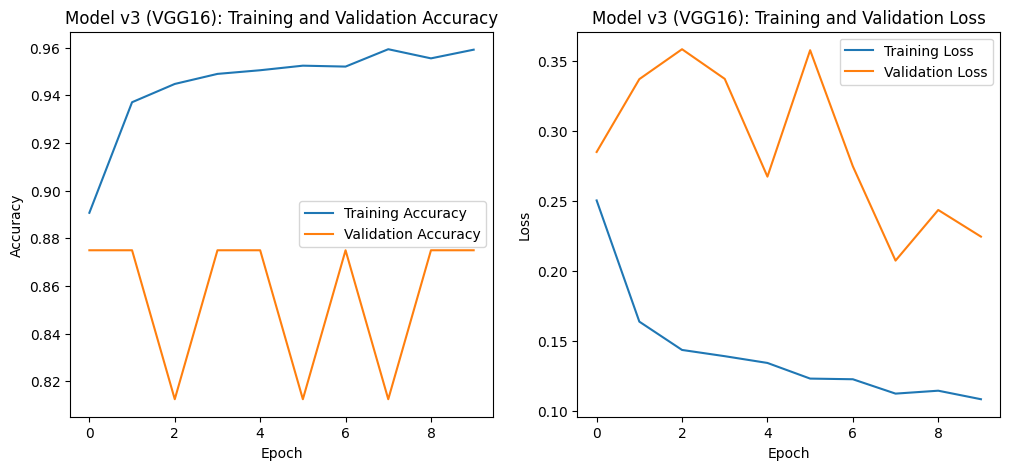

In [18]:
# Step 2: Plot the learning curves for the expert model (history_v3)

print("\n--- Plotting Learning Curves for The Expert Model (v3) ---")
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_v3.history['accuracy'], label='Training Accuracy')
plt.plot(history_v3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model v3 (VGG16): Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_v3.history['loss'], label='Training Loss')
plt.plot(history_v3.history['val_loss'], label='Validation Loss')
plt.title('Model v3 (VGG16): Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.show()
